# Avacardo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
# importing dataset
df=pd.read_csv(r"C:\Users\farhan\OneDrive\Desktop\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
#checking for null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [8]:
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(df["type"])
pd.Series(df1).unique()

array([0, 1])

In [9]:
df["type"]=df1

In [10]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


# Modeling Avacado Project Dataset Taking "Average Price" As Label


In [11]:
df=df.drop(["Unnamed: 0","Date","region","year","Small Bags","Large Bags","XLarge Bags"],axis=1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0
...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1


## Pair Plot

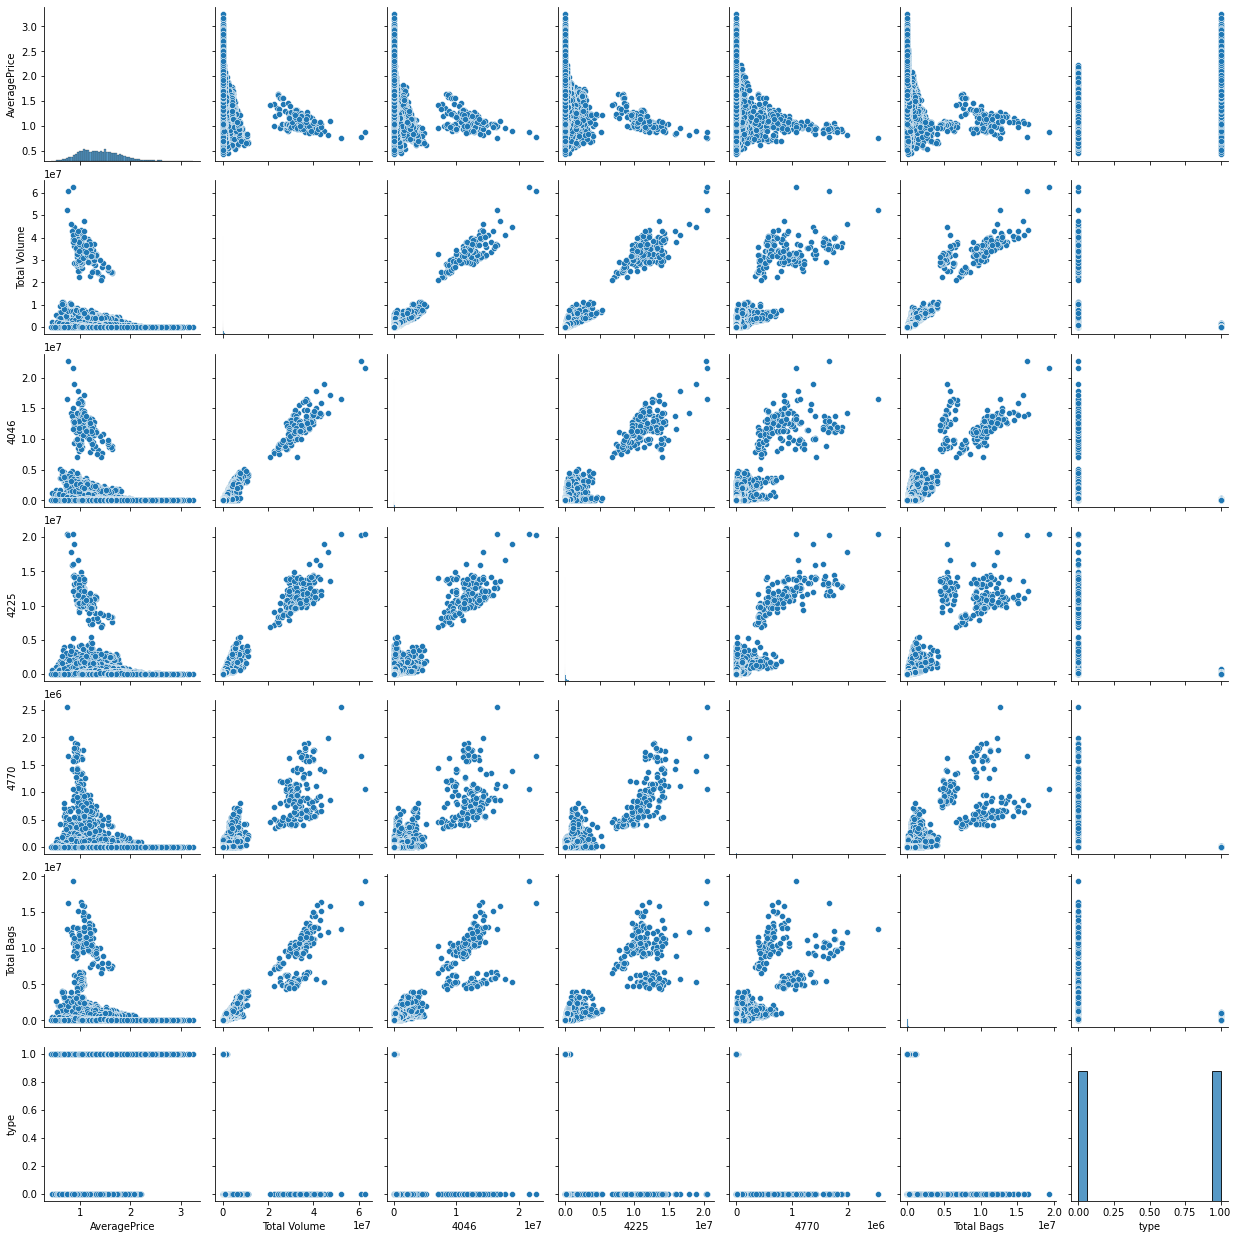

In [12]:
sns.pairplot(df)

## Box plot

AveragePrice       AxesSubplot(0.125,0.749828;0.168478x0.130172)
Total Volume    AxesSubplot(0.327174,0.749828;0.168478x0.130172)
4046            AxesSubplot(0.529348,0.749828;0.168478x0.130172)
4225            AxesSubplot(0.731522,0.749828;0.168478x0.130172)
4770               AxesSubplot(0.125,0.593621;0.168478x0.130172)
Total Bags      AxesSubplot(0.327174,0.593621;0.168478x0.130172)
type            AxesSubplot(0.529348,0.593621;0.168478x0.130172)
dtype: object

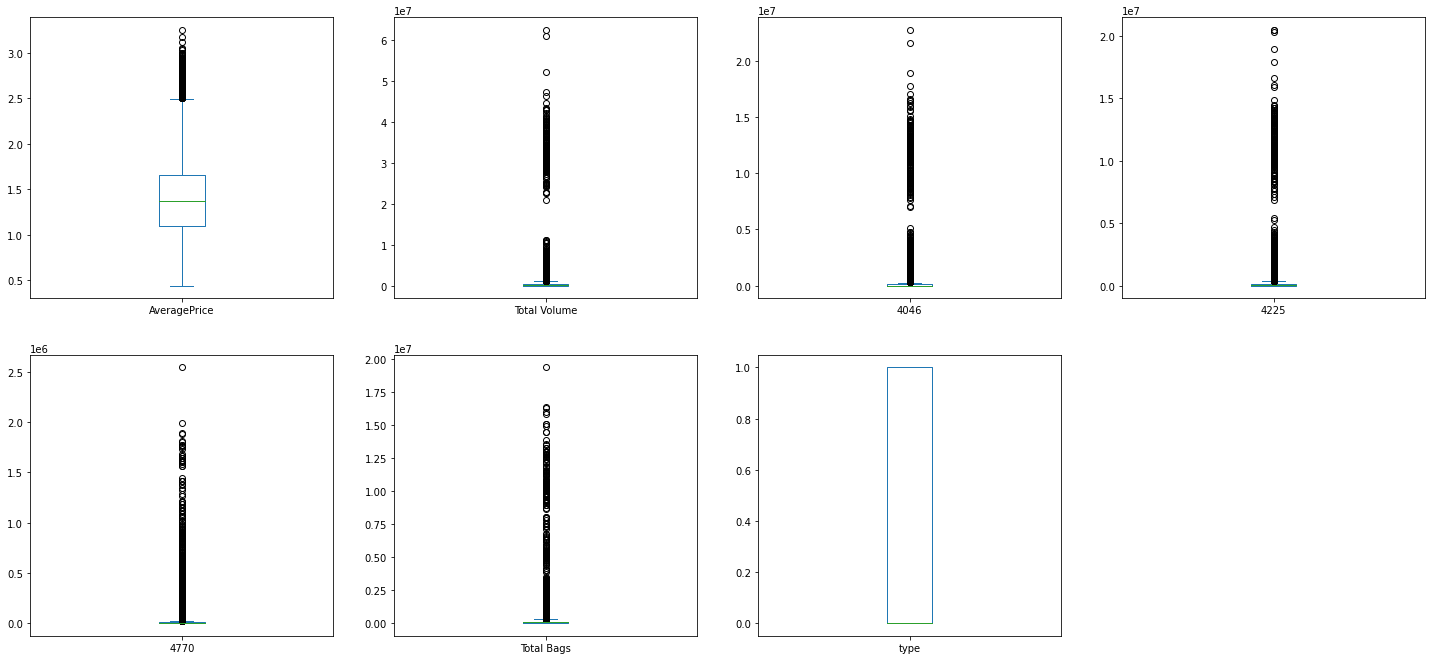

In [13]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(25,30))

## Scatter Plot

In [14]:
X=df.drop(columns="AveragePrice")
Y=df["AveragePrice"]

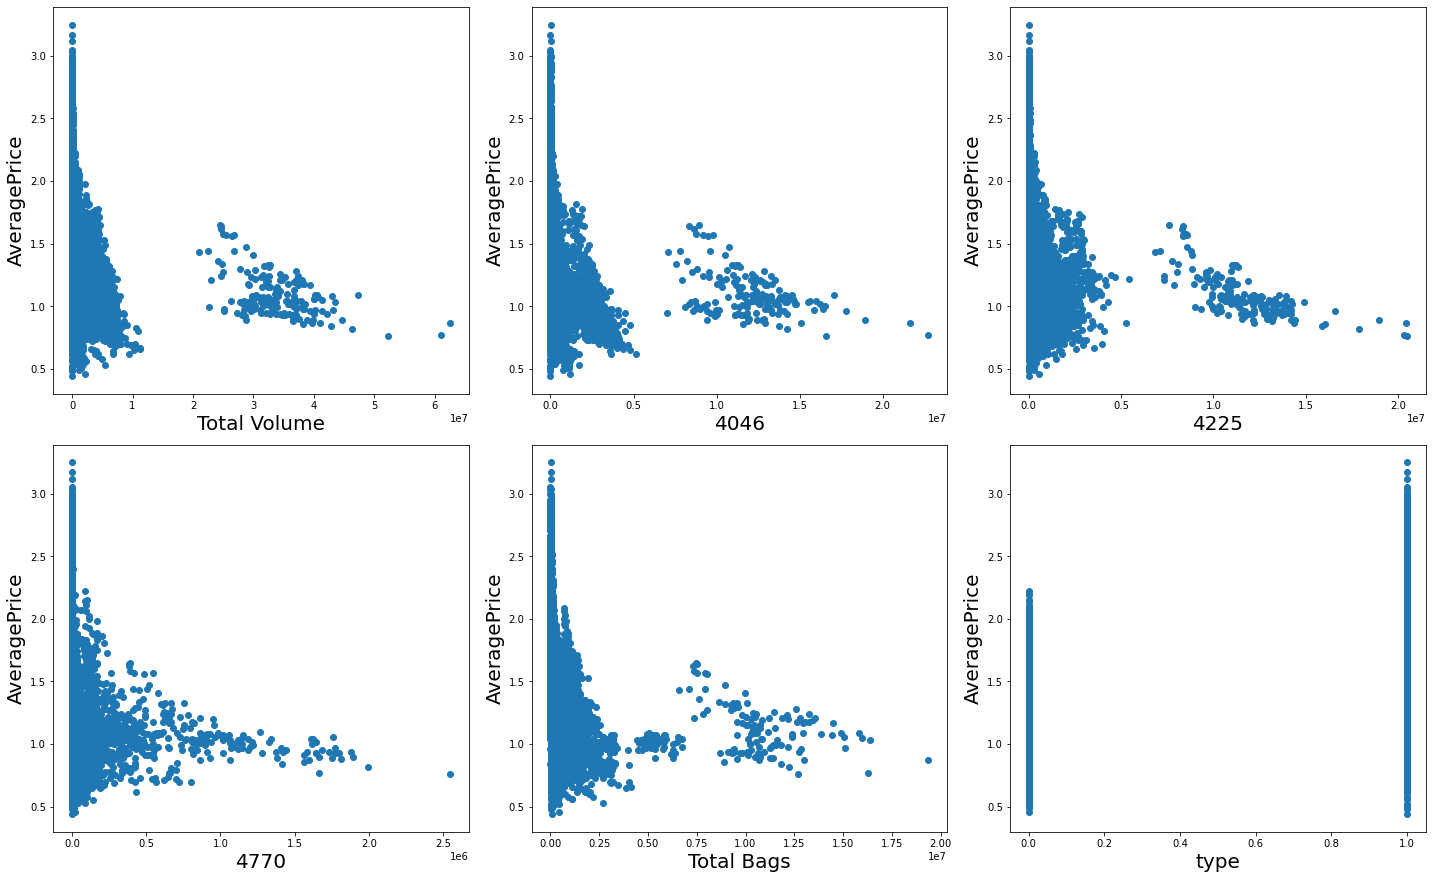

In [15]:
plt.figure(figsize=(20,30))
pltnumber=1

for column in X:
    if pltnumber<=15:
        ax=plt.subplot(5,3,pltnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    pltnumber+=1
plt.tight_layout()

## Dist Plot

0.5802550380696565
9.006947063504116
8.647508889260688
8.941730553303788
10.158560543509228
9.755269739145234
0.000328785143354492


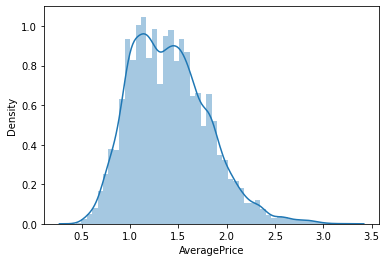

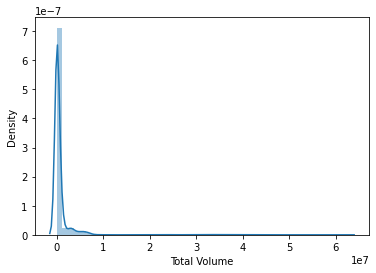

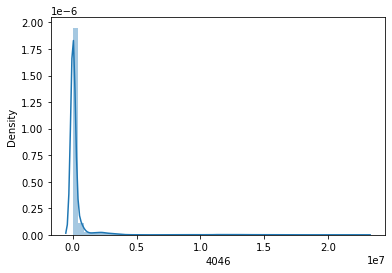

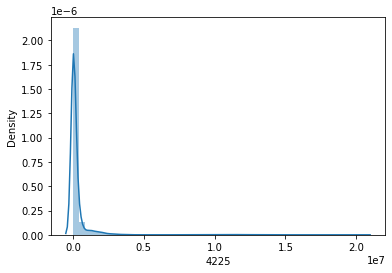

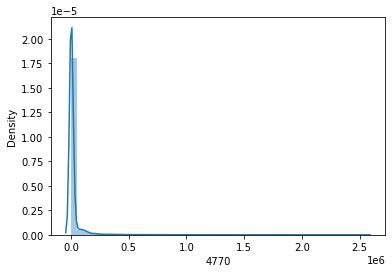

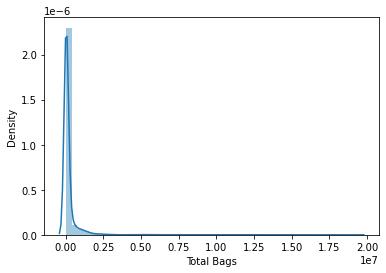

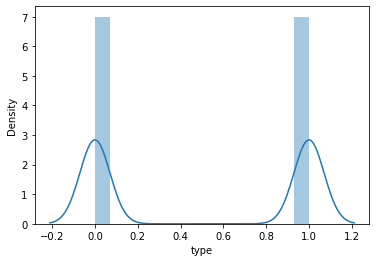

In [16]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [17]:
df["Total Volume"]=np.cbrt(df["Total Volume"])
df["4046"]=np.cbrt(df["4046"])
df["4225"]=np.cbrt(df["4225"])
df["4770"]=np.cbrt(df["4770"])
df["Total Bags"]=np.cbrt(df["Total Bags"])
df.skew()

AveragePrice    0.580303
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
type            0.000329
dtype: float64

In [18]:
df["Total Volume"]=np.sqrt(df["Total Volume"])
df["4046"]=np.sqrt(df["4046"])
df["4225"]=np.sqrt(df["4225"])
df["4770"]=np.sqrt(df["4770"])
df["Total Bags"]=np.sqrt(df["Total Bags"])
df.skew()

AveragePrice    0.580303
Total Volume    0.950027
4046            0.850203
4225            0.717992
4770            0.605972
Total Bags      0.890696
type            0.000329
dtype: float64

In [19]:
X=df.drop(columns="AveragePrice")
Y=df["AveragePrice"]

In [20]:
# To find corelation using Heatmap and VIF technique
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,108.535345,Total Volume
1,12.392008,4046
2,21.352700,4225
3,4.145175,4770
4,21.588851,Total Bags
5,2.563565,type


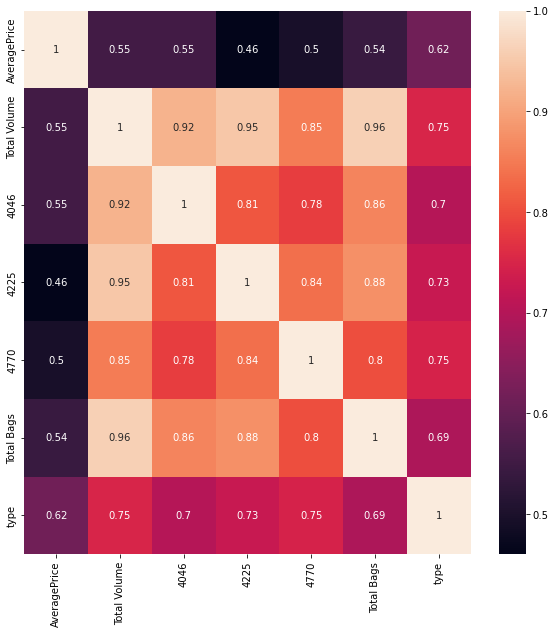

In [21]:
df_corr=df.corr().abs()
df_corr
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True)
plt.show()

# Model Training Using Linear Regression Without HyperParamter Tuning

In [22]:
X=df.drop(columns="AveragePrice")
Y=df["AveragePrice"]

In [23]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [25]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [26]:
Y_pred=lm.predict(X_test)
Y_pred_train=lm.predict(X_train)

In [27]:
lm.score(X_train,Y_train)
lm.score(X_test,Y_test)

0.438274559792847

In [28]:
import statsmodels.formula.api as smf

In [29]:
est=smf.ols(formula='Y~X',data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     2507.
Date:                Sun, 10 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:13:18   Log-Likelihood:                -3806.9
No. Observations:               18249   AIC:                             7628.
Df Residuals:                   18242   BIC:                             7682.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4812      0.012    123.363      0.000       1.458       1.505
X[0]          -0.1718      0.008    -20.779      0.000      -0.188      -0.156
X[1]           0.0150      0.003      5.340      0.000       0.009       0.020
X[2]           0.1289      0.004     32.106      0.000       0.121       0.137
X[3]           0.0041      0.002      2.089      0.037       0.000       0.008
X[4]           0.0211      0.005      4.518      0.000       0.012       0.030
X[5]           0.3912      0.007     55.345      0.000       0.377       0.405
==============================================================================
Omnibus:                      978.371   Durbin-Watson:                   0.303
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1580.365
Skew:                           0.449   Prob(JB):                         0.00
Kurtosis:                       4.127   Cond. No.                         84.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2=r2_score(Y_test,Y_pred)

In [32]:
r2

0.438274559792847

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross_val=cross_val_score(lm,X_train,Y_train,scoring="r2",cv=5)
cross_val

array([0.46131769, 0.45627012, 0.44616464, 0.46588169, 0.44934344])

In [35]:
cross_val.mean()

0.4557955146809123

In [36]:
mean_absolute_error(Y_test,Y_pred)


0.23114903606989895

In [37]:
mean_squared_error(Y_test,Y_pred)

0.09145103410503914

In [38]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.30240872028603794

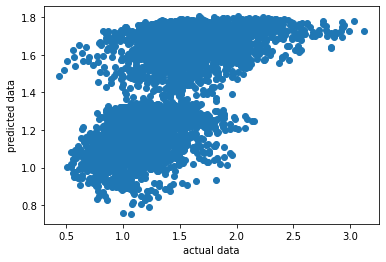

In [39]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Model Training Using Linear Regression With HyperParamter Tuning


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
ridge=Ridge()

In [42]:
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="r2",cv=5)

In [43]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [44]:
print(ridge_regressor.best_params_)


{'alpha': 1}


In [45]:
print(ridge_regressor.best_score_)

0.45579674506759654


In [46]:
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ridge

array([1.57427167, 1.20610373, 1.11566423, ..., 1.09175163, 1.29352421,
       1.67147672])

In [47]:
ridge_regressor.score(X_test,Y_test)

0.43826106577124013

In [48]:
y_pred=ridge_regressor.predict(X_test)

In [49]:
r2=r2_score(Y_test,y_pred)

In [50]:
r2

0.43826106577124013

In [51]:
cross_val=cross_val_score(ridge_regressor,X_train,Y_train,scoring="r2",cv=5)
cross_val

array([0.46131847, 0.45618198, 0.44616441, 0.46588139, 0.44934422])

In [52]:
cross_val.mean()

0.45577809511095496

In [53]:
mean_absolute_error(Y_test,y_pred)


0.23114776201530007

In [54]:
mean_squared_error(Y_test,y_pred)

0.09145323098298316

In [55]:
np.sqrt(mean_squared_error(Y_test,y_pred))

0.30241235256348764

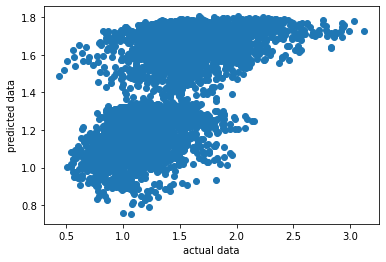

In [56]:
plt.scatter(Y_test,y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Model Training Using KNN Without HyperParamter Tuning


In [57]:
X=df.drop(columns="AveragePrice")
Y=df["AveragePrice"]

In [58]:
scaler=StandardScaler()

In [59]:
X_scaled=scaler.fit_transform(X)

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [61]:
knn=KNeighborsRegressor()

In [62]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [63]:
Y_pred=knn.predict(X_test)

In [64]:
knn.score(X_train,Y_train)

0.8014994268682647

In [65]:
knn.score(X_test,Y_test)

0.6993535114709867

In [66]:
r2=r2_score(Y_test,Y_pred)
r2

0.6993535114709867

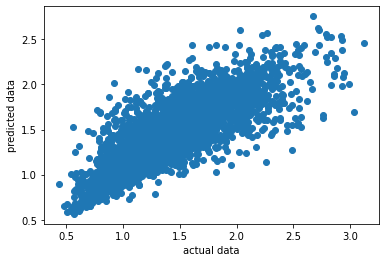

In [67]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# KNN MODEL USING HYPERPARAMETER TUNING

In [68]:
scaler=StandardScaler()

In [69]:
X_scaled=scaler.fit_transform(X)

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [71]:
knn=KNeighborsRegressor()

In [72]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [73]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [74]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [75]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [76]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [77]:
clf.score(X_train,Y_train)

0.7761313206600573

In [78]:
clf.score(X_test,Y_test)

0.7021930998543108

In [79]:
r2=r2_score(Y_test,Y_pred)
r2

0.7021930998543108

# DECISION TREE MODEL


In [80]:
X=df.drop(columns="AveragePrice")
Y=df["AveragePrice"]

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [83]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [84]:
Y_pred=dt.predict(X_test)

In [85]:
r2=r2_score(Y_test,Y_pred)
r2

0.412099140205905

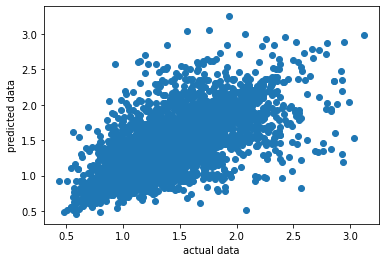

In [86]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# DECISION TREE WITH HYPER PARAMETER TUNING

In [87]:
X=df.drop(columns="AveragePrice")
Y=df["AveragePrice"]

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [89]:
dt=DecisionTreeRegressor()


In [90]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':["mse", "friedman_mse", "mae", "poisson"]}

In [91]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1)

In [92]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [93]:
clf.best_params_

{'criterion': 'mse',
 'max_depth': 11,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [94]:
Y_pred=clf.predict(X_test)


In [95]:
clf.score(X_train,Y_train)

0.7400216896381941

In [96]:
clf.score(X_test,Y_test)

0.5846829117498477

In [97]:
r2=r2_score(Y_test,Y_pred)
r2

0.5846829117498477

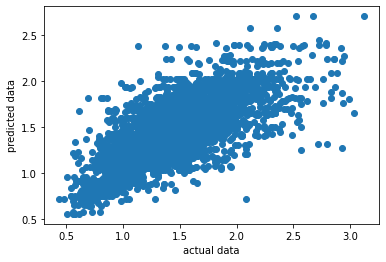

In [98]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Modeling Using Gradient Boosting

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
X=df.drop(columns="AveragePrice")
Y=df["AveragePrice"]

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [102]:
gbdt=GradientBoostingRegressor()

In [103]:
gbdt.fit(X_train,Y_train)

GradientBoostingRegressor()

In [104]:
Y_pred=gbdt.predict(X_test)


In [105]:
r2=r2_score(Y_test,Y_pred)
r2

0.5473711089012523

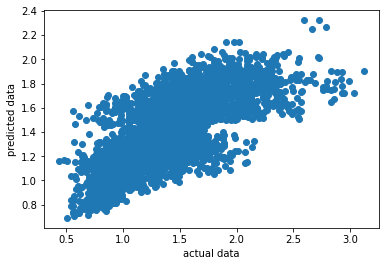

In [106]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Conclusion:
Conducted 4 models on Avacado Project dataset namely, Linear Regression, KNN, Desicion Tree and Gradient Boosting with Hyperparameter tuning
It comes to a conclusion that KNearest Neighbour model is providing best score for Avacado Project dataset
r2_score=0.7021930998543108

# Modeling Avacado Project Dataset Taking "Region" As Label

In [108]:
df1=pd.read_csv(r"C:\Users\farhan\OneDrive\Desktop\avocado.csv")
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [109]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df1["type"])
pd.Series(df2).unique()

array([0, 1])

In [110]:
df1["type"]=df2

In [111]:
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico


In [112]:
df1=df1.drop(["Unnamed: 0","Date","AveragePrice","year","Small Bags","Large Bags","XLarge Bags"],axis=1)
df1

,Total Volume,4046,4225,4770,Total Bags,type,region
0,64236.62,1036.74,54454.85,48.16,8696.87,0,Albany
1,54876.98,674.28,44638.81,58.33,9505.56,0,Albany
2,118220.22,794.70,109149.67,130.50,8145.35,0,Albany
3,78992.15,1132.00,71976.41,72.58,5811.16,0,Albany
4,51039.60,941.48,43838.39,75.78,6183.95,0,Albany
...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,1,WestTexNewMexico
18245,13888.04,1191.70,3431.50,0.00,9264.84,1,WestTexNewMexico
18246,13766.76,1191.92,2452.79,727.94,9394.11,1,WestTexNewMexico
18247,16205.22,1527.63,2981.04,727.01,10969.54,1,WestTexNewMexico


In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
df1

,Total Volume,4046,4225,4770,Total Bags,type,region
0,64236.62,1036.74,54454.85,48.16,8696.87,0,Albany
1,54876.98,674.28,44638.81,58.33,9505.56,0,Albany
2,118220.22,794.70,109149.67,130.50,8145.35,0,Albany
3,78992.15,1132.00,71976.41,72.58,5811.16,0,Albany
4,51039.60,941.48,43838.39,75.78,6183.95,0,Albany
...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,1,WestTexNewMexico
18245,13888.04,1191.70,3431.50,0.00,9264.84,1,WestTexNewMexico
18246,13766.76,1191.92,2452.79,727.94,9394.11,1,WestTexNewMexico
18247,16205.22,1527.63,2981.04,727.01,10969.54,1,WestTexNewMexico


In [115]:
lab_encoder=LabelEncoder()
df3=lab_encoder.fit_transform(df1['region'])
pd.Series(df3)
df1['region']=df3
df1

,Total Volume,4046,4225,4770,Total Bags,type,region
0,64236.62,1036.74,54454.85,48.16,8696.87,0,0
1,54876.98,674.28,44638.81,58.33,9505.56,0,0
2,118220.22,794.70,109149.67,130.50,8145.35,0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,0,0
4,51039.60,941.48,43838.39,75.78,6183.95,0,0
...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,1,53
18245,13888.04,1191.70,3431.50,0.00,9264.84,1,53
18246,13766.76,1191.92,2452.79,727.94,9394.11,1,53
18247,16205.22,1527.63,2981.04,727.01,10969.54,1,53


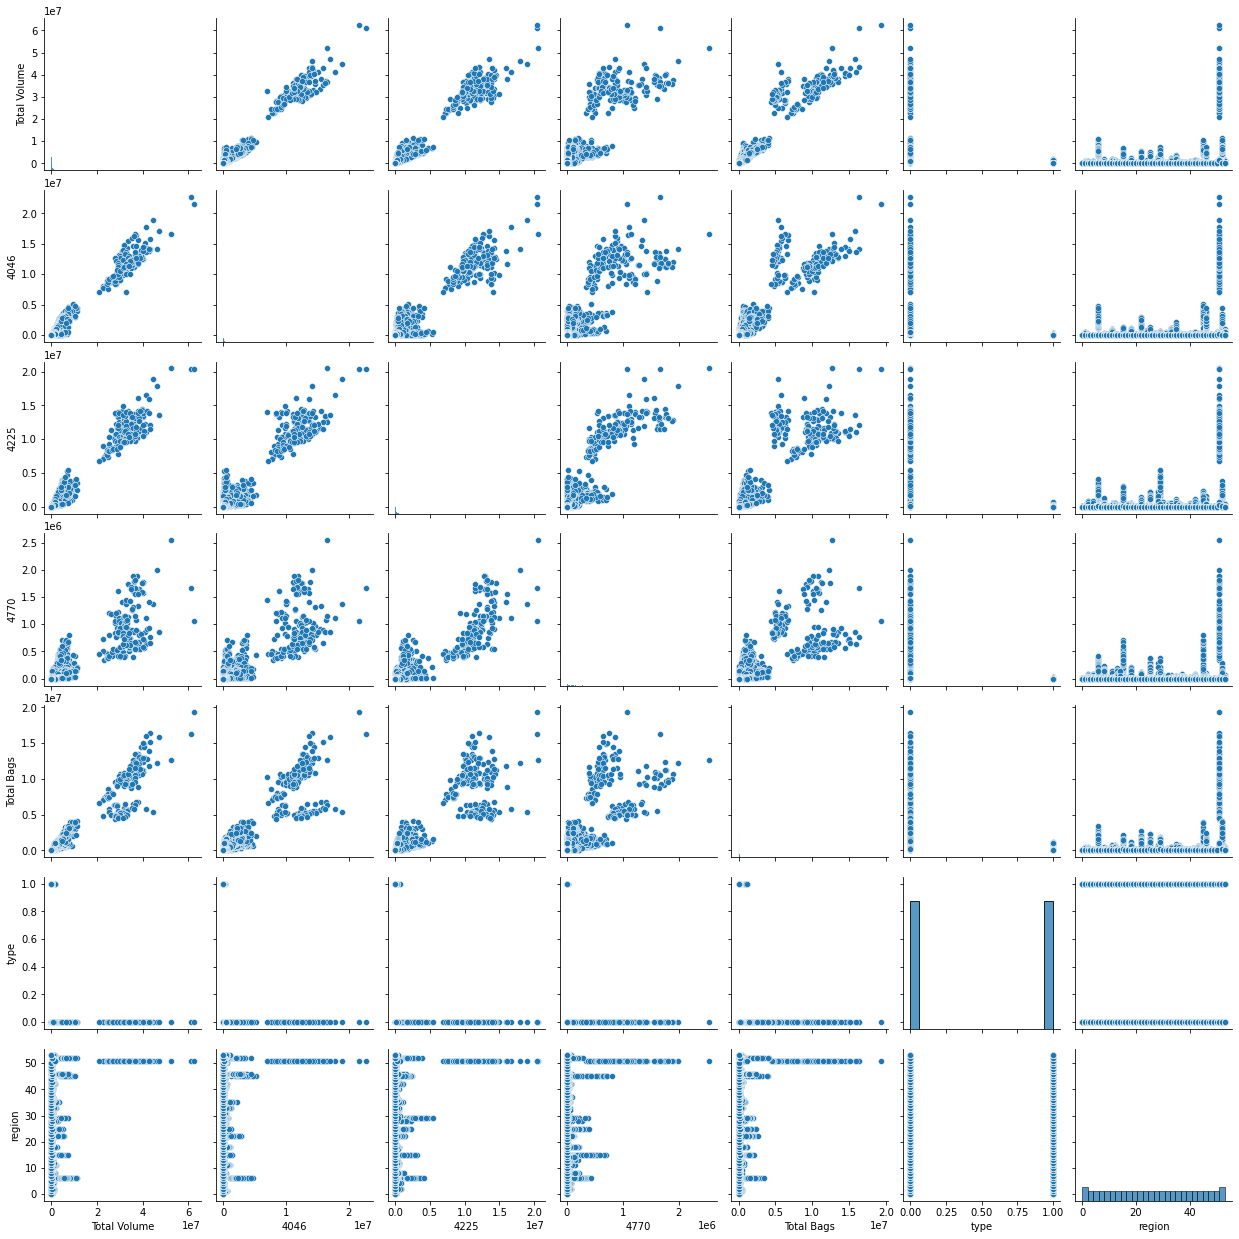

In [116]:
sns.pairplot(df1)

Total Volume       AxesSubplot(0.125,0.749828;0.168478x0.130172)
4046            AxesSubplot(0.327174,0.749828;0.168478x0.130172)
4225            AxesSubplot(0.529348,0.749828;0.168478x0.130172)
4770            AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.168478x0.130172)
type            AxesSubplot(0.327174,0.593621;0.168478x0.130172)
region          AxesSubplot(0.529348,0.593621;0.168478x0.130172)
dtype: object

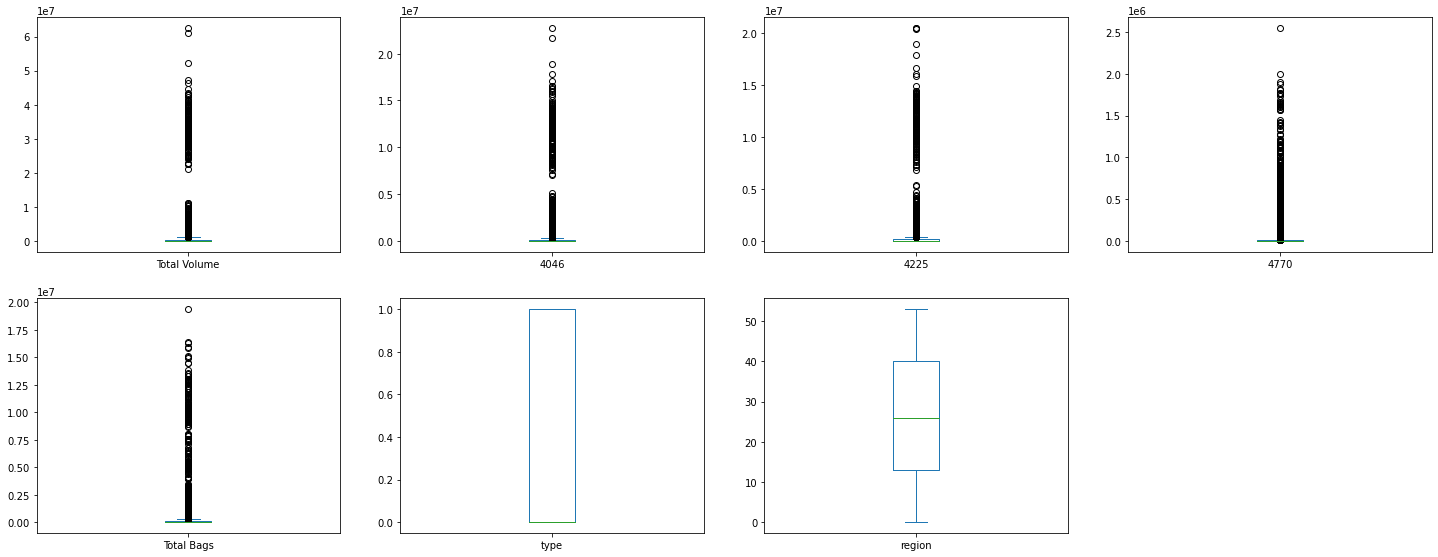

In [117]:
df1.plot(kind='box',subplots=True,layout=(5,4),figsize=(25,25))

In [118]:
X=df1.drop(columns="region")
Y=df1["region"]

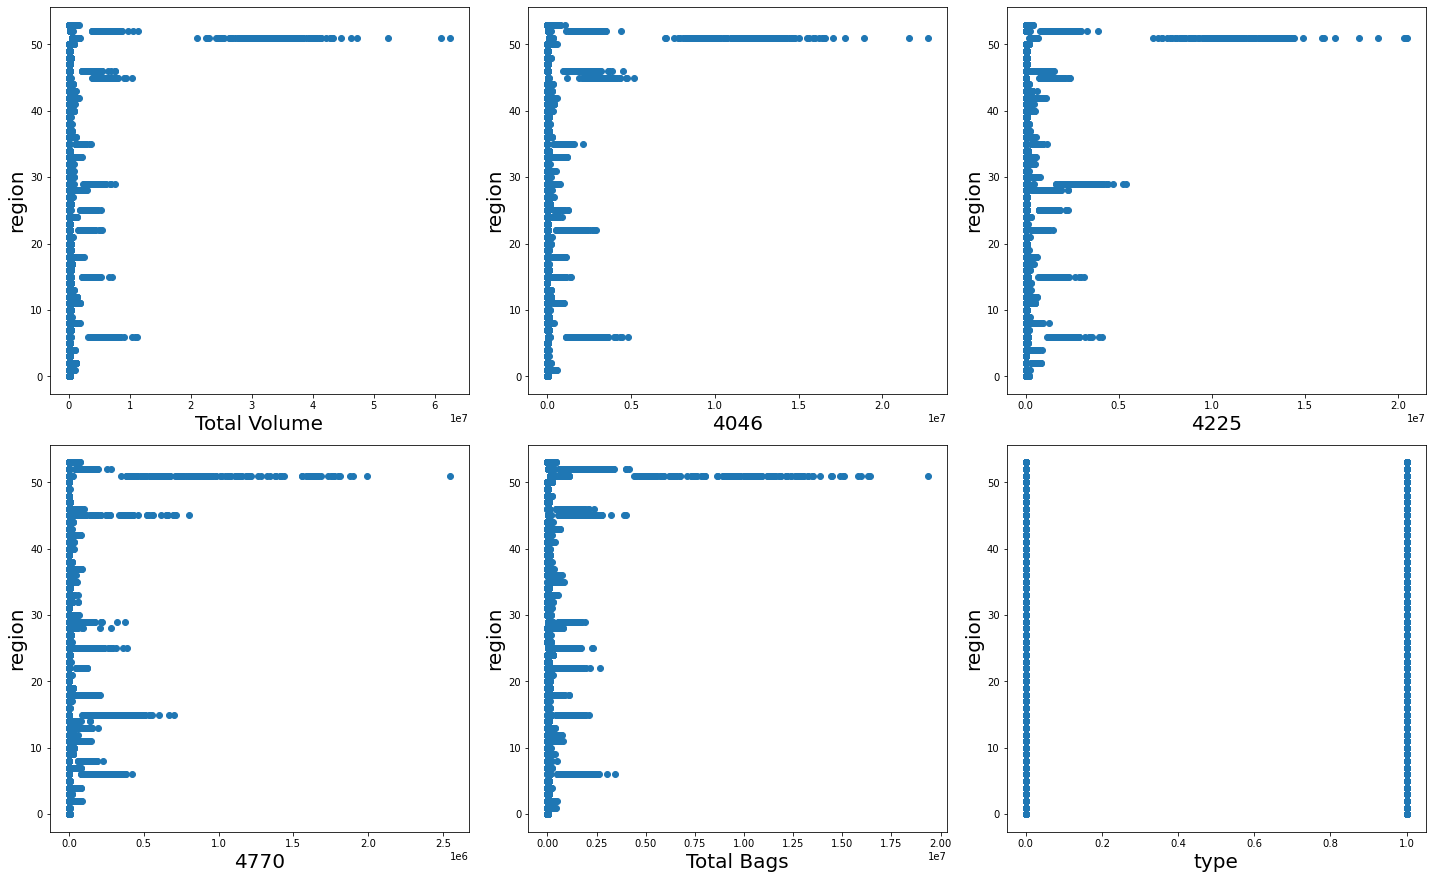

In [119]:
plt.figure(figsize=(20,30))
pltnumber=1

for column in X:
    if pltnumber<=15:
        ax=plt.subplot(5,3,pltnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('region',fontsize=20)
    pltnumber+=1
plt.tight_layout()

9.006947063504116
8.647508889260688
8.941730553303788
10.158560543509228
9.755269739145234
0.000328785143354492
3.0245546103952823e-05


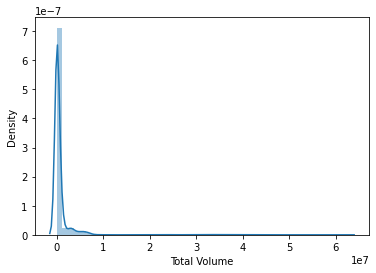

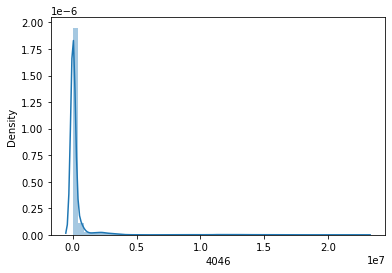

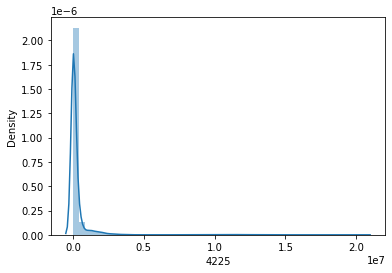

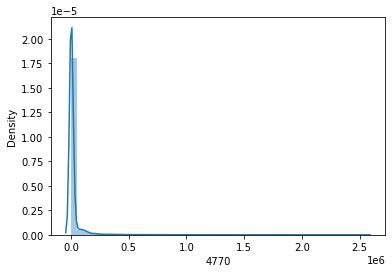

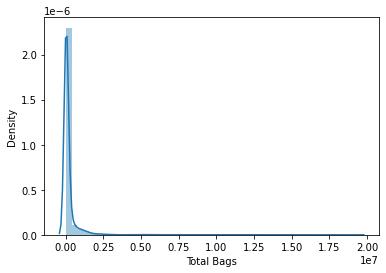

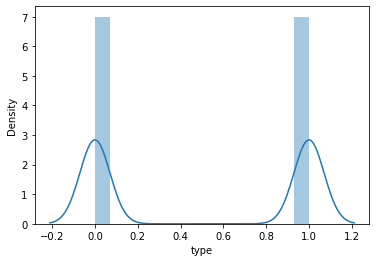

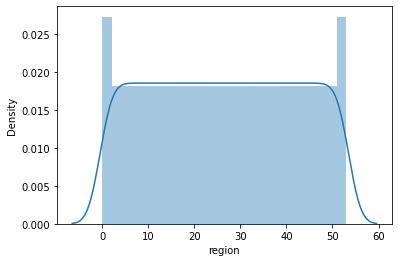

In [120]:
for col in df1:
    print(skew(df1[col]))
    plt.figure()
    sns.distplot(df1[col])
    plt.show

In [121]:
df1["Total Volume"]=np.cbrt(df1["Total Volume"])
df1["4046"]=np.cbrt(df1["4046"])
df1["4225"]=np.cbrt(df1["4225"])
df1["4770"]=np.cbrt(df1["4770"])
df1["Total Bags"]=np.cbrt(df1["Total Bags"])
df1.skew()

Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
type            0.000329
region          0.000030
dtype: float64

In [122]:
df1["Total Volume"]=np.sqrt(df1["Total Volume"])
df1["4046"]=np.sqrt(df1["4046"])
df1["4225"]=np.sqrt(df1["4225"])
df1["4770"]=np.sqrt(df1["4770"])
df1["Total Bags"]=np.sqrt(df1["Total Bags"])
df1.skew()

Total Volume    0.950027
4046            0.850203
4225            0.717992
4770            0.605972
Total Bags      0.890696
type            0.000329
region          0.000030
dtype: float64

In [123]:
X=df1.drop(columns="region")
Y=df1["region"]

In [124]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,108.535345,Total Volume
1,12.392008,4046
2,21.352700,4225
3,4.145175,4770
4,21.588851,Total Bags
5,2.563565,type


In [125]:
df1=df1.drop(["Total Volume"],axis=1)
df1

,4046,4225,4770,Total Bags,type,region
0,3.181351,6.156579,1.907426,4.534825,0,0
1,2.961238,5.955965,1.969316,4.602526,0,0
2,3.043457,6.913061,2.252173,4.485577,0,0
3,3.228304,6.449584,2.042378,4.240110,0,0
4,3.130655,5.938031,2.057118,4.284278,0,0
...,...,...,...,...,...,...
18244,3.563293,3.394252,0.000000,4.879573,1,53
18245,3.256076,3.883715,0.000000,4.582892,1,53
18246,3.256176,3.672344,2.999273,4.593488,1,53
18247,3.393671,3.793685,2.998634,4.713730,1,53


In [126]:
X=df1.drop(columns="region")
Y=df1["region"]

In [127]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,4.424128,4046
1,5.687400,4225
2,4.142379,4770
3,6.117115,Total Bags
4,2.525064,type


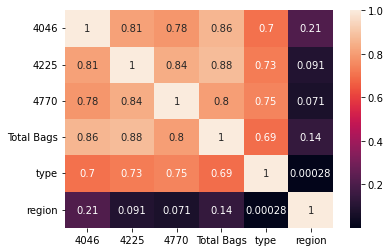

In [128]:
df_corr1=df1.corr().abs()
df_corr1
sns.heatmap(df_corr1,annot=True)
plt.show()

# Model Training Using Logistic Regression Without HyperParamter Tuning


In [129]:
X=df1.drop(columns="region")
Y=df1["region"]

In [130]:
scaler=StandardScaler()

In [131]:
X_scaled=scaler.fit_transform(X)

In [132]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
lr=LogisticRegression()

In [135]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [136]:
Y_pred=lr.predict(X_test)
Y_pred_train=lr.predict(X_train)

In [137]:
accuracy=accuracy_score(Y_test,Y_pred)

In [138]:
accuracy

0.3482358097742713

In [139]:
conf_mat=confusion_matrix(Y_test,Y_pred)

In [140]:
conf_mat

array([[43,  0,  0, ...,  0,  0,  0],
       [ 0, 25,  0, ...,  0,  0,  0],
       [ 0,  0, 42, ...,  0,  0,  3],
       ...,
       [ 0,  0,  0, ..., 94,  0,  0],
       [ 0,  0,  0, ...,  0, 52,  0],
       [ 0, 15,  1, ...,  0,  0, 21]], dtype=int64)

In [141]:
from sklearn.metrics import classification_report

In [142]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.31      0.54      0.39        80
           1       0.17      0.32      0.22        79
           2       0.55      0.51      0.52        83
           3       0.50      0.39      0.44       104
           4       0.36      0.53      0.43        74
           5       0.32      0.41      0.36        99
           6       0.59      0.75      0.66        88
           7       0.35      0.52      0.42        87
           8       0.60      0.69      0.64        86
           9       0.07      0.03      0.04       100
          10       0.19      0.09      0.13        74
          11       0.47      0.28      0.35        83
          12       0.19      0.19      0.19        95
          13       0.10      0.07      0.09        95
          14       0.28      0.40      0.33        77
          15       0.37      0.23      0.29        73
          16       0.11      0.06      0.08       100
          17       0.37    

# Logistic Regression model using Hyperparameter


In [143]:
scaler=StandardScaler()

In [144]:
X_scaled=scaler.fit_transform(X)

In [145]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [146]:
lr=LogisticRegression()

In [147]:
param_grid=[
    {'penalty':['l2'],
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs'],
    'max_iter':[100]
    }
]

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
clf=GridSearchCV(lr,param_grid,cv=3,n_jobs=-1)

In [150]:
best_clf=clf.fit(X,Y)

In [151]:
best_clf.best_params_

{'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [152]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100], 'penalty': ['l2'],
                          'solver': ['lbfgs']}])

In [153]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [154]:
accuracy=accuracy_score(Y_test,Y_pred)

In [155]:
accuracy

0.3694937541091387

In [156]:
conf_mat=confusion_matrix(Y_test,Y_pred)

In [157]:
conf_mat

array([[42,  0,  0, ...,  0,  0,  0],
       [ 0, 24,  0, ...,  0,  0,  1],
       [ 0,  0, 48, ...,  0,  0,  8],
       ...,
       [ 0,  0,  0, ..., 93,  1,  0],
       [ 0,  0,  0, ...,  0, 49,  0],
       [ 0, 14,  0, ...,  0,  0, 25]], dtype=int64)

In [158]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.37      0.53      0.43        80
           1       0.18      0.30      0.23        79
           2       0.48      0.58      0.53        83
           3       0.48      0.33      0.39       104
           4       0.42      0.57      0.48        74
           5       0.44      0.49      0.47        99
           6       0.63      0.78      0.70        88
           7       0.37      0.45      0.40        87
           8       0.68      0.71      0.69        86
           9       0.12      0.06      0.08       100
          10       0.17      0.12      0.14        74
          11       0.39      0.29      0.33        83
          12       0.21      0.21      0.21        95
          13       0.11      0.07      0.09        95
          14       0.31      0.40      0.35        77
          15       0.38      0.27      0.32        73
          16       0.32      0.27      0.29       100
          17       0.40    

# Using KNN

In [159]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [160]:
X=df1.drop(columns="region")
Y=df1["region"]

In [161]:
scaler=StandardScaler()

In [162]:
X_scaled=scaler.fit_transform(X)

In [163]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [164]:
knn=KNeighborsClassifier()

In [165]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [166]:
Y_pred=knn.predict(X_test)

In [167]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[67,  0,  0, ...,  0,  0,  0],
       [ 0, 57,  0, ...,  0,  0,  2],
       [ 0,  0, 75, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 94,  0,  0],
       [ 0,  0,  0, ...,  0, 76,  0],
       [ 0,  3,  1, ...,  0,  0, 54]], dtype=int64)

In [168]:
accuracy=accuracy_score(Y_test,Y_pred)

In [169]:
accuracy

0.7825991672145518

In [170]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        80
           1       0.58      0.72      0.64        79
           2       0.93      0.90      0.91        83
           3       0.78      0.76      0.77       104
           4       0.81      0.85      0.83        74
           5       0.79      0.55      0.65        99
           6       0.91      0.93      0.92        88
           7       0.79      0.95      0.86        87
           8       0.92      0.97      0.94        86
           9       0.72      0.82      0.77       100
          10       0.56      0.73      0.64        74
          11       0.76      0.86      0.80        83
          12       0.74      0.81      0.77        95
          13       0.81      0.63      0.71        95
          14       0.55      0.61      0.58        77
          15       0.96      0.97      0.97        73
          16       0.91      0.91      0.91       100
          17       0.82    

# USING KNN WITH HYPERPARAMETER TUNING

In [171]:
X=df1.drop(columns="region")
Y=df1["region"]

In [172]:
scaler=StandardScaler()

In [173]:
X_scaled=scaler.fit_transform(X)

In [174]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [175]:
knn=KNeighborsClassifier()

In [176]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [177]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [178]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [179]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 5}

In [180]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [181]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[67,  0,  0, ...,  0,  0,  0],
       [ 0, 57,  0, ...,  0,  0,  2],
       [ 0,  0, 75, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 94,  0,  0],
       [ 0,  0,  0, ...,  0, 76,  0],
       [ 0,  3,  1, ...,  0,  0, 54]], dtype=int64)

In [182]:
accuracy=accuracy_score(Y_test,Y_pred)

In [183]:
accuracy

0.7825991672145518

In [184]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        80
           1       0.58      0.72      0.64        79
           2       0.93      0.90      0.91        83
           3       0.78      0.76      0.77       104
           4       0.81      0.85      0.83        74
           5       0.79      0.55      0.65        99
           6       0.91      0.93      0.92        88
           7       0.79      0.95      0.86        87
           8       0.92      0.97      0.94        86
           9       0.72      0.82      0.77       100
          10       0.56      0.73      0.64        74
          11       0.76      0.86      0.80        83
          12       0.74      0.81      0.77        95
          13       0.81      0.63      0.71        95
          14       0.55      0.61      0.58        77
          15       0.96      0.97      0.97        73
          16       0.91      0.91      0.91       100
          17       0.82    

# Using Random Forest

In [185]:
X=df1.drop(columns="region")
Y=df1["region"]

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [187]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
Y_pred=rf_classifier.predict(X_test)

In [188]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[65  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  3]
 [ 0  0 73 ...  0  0  0]
 ...
 [ 0  0  0 ... 94  0  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  3  2 ...  0  0 54]]
0.7547666009204471
              precision    recall  f1-score   support

           0       0.66      0.81      0.73        80
           1       0.55      0.63      0.59        79
           2       0.87      0.88      0.87        83
           3       0.75      0.80      0.77       104
           4       0.82      0.82      0.82        74
           5       0.75      0.59      0.66        99
           6       0.89      0.98      0.93        88
           7       0.71      0.83      0.76        87
           8       0.88      0.93      0.90        86
           9       0.76      0.83      0.79       100
          10       0.50      0.64      0.56        74
          11       0.73      0.81      0.77        83
          12       0.76      0.79      0.77        95
          13       0.69      0.60      0.64        95
          14  

# RANDOM FOREST WITH HYPERPARAMETER GRID


In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf=RandomForestClassifier()

In [191]:
param_grid={
    'max_depth': range(3,12,2),
    'min_samples_split': range(4,10,2),
    'min_samples_leaf': range(3,10,2),
    'criterion':['gini','entropy']}

In [192]:
clf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)

In [193]:
clf.fit(X_train,Y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)},
             verbose=2)

In [194]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [195]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [196]:
clf.score(X_train,Y_train)

0.8605874616396317

In [197]:
print(confusion_matrix(Y_test,Y_pred))

[[60  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  1]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 94  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  2  1 ...  0  0 54]]


In [198]:
accuracy=accuracy_score(Y_test,Y_pred)

In [199]:
accuracy

0.7580539119000658

In [200]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        80
           1       0.67      0.61      0.64        79
           2       0.87      0.90      0.89        83
           3       0.88      0.77      0.82       104
           4       0.89      0.80      0.84        74
           5       0.77      0.49      0.60        99
           6       0.91      0.93      0.92        88
           7       0.77      0.74      0.75        87
           8       0.93      0.86      0.89        86
           9       0.75      0.80      0.78       100
          10       0.51      0.70      0.59        74
          11       0.79      0.80      0.79        83
          12       0.74      0.78      0.76        95
          13       0.76      0.68      0.72        95
          14       0.66      0.60      0.63        77
          15       0.96      0.97      0.97        73
          16       0.91      0.90      0.90       100
          17       0.81    

# Using Gradient Boosting

In [201]:
from sklearn.ensemble import GradientBoostingClassifier

In [202]:
X=df1.drop(columns="region")
Y=df1["region"]

In [203]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [204]:
gbdt=GradientBoostingClassifier()

In [205]:
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier()

In [206]:
Y_pred=gbdt.predict(X_test)


In [207]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[59,  0,  0, ...,  0,  0,  0],
       [ 0, 44,  0, ...,  0,  0,  0],
       [ 0,  0, 66, ...,  0,  0,  1],
       ...,
       [ 0,  0,  0, ..., 94,  0,  0],
       [ 0,  0,  0, ...,  0, 78,  0],
       [ 0,  1,  2, ...,  0,  0, 48]], dtype=int64)

In [208]:
accuracy=accuracy_score(Y_test,Y_pred)

In [209]:
accuracy

0.7229892614507999

In [210]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        80
           1       0.61      0.56      0.58        79
           2       0.84      0.80      0.81        83
           3       0.81      0.76      0.78       104
           4       0.79      0.62      0.70        74
           5       0.76      0.58      0.66        99
           6       0.95      0.85      0.90        88
           7       0.73      0.82      0.77        87
           8       0.87      0.93      0.90        86
           9       0.75      0.77      0.76       100
          10       0.45      0.54      0.49        74
          11       0.72      0.73      0.73        83
          12       0.75      0.73      0.74        95
          13       0.74      0.74      0.74        95
          14       0.58      0.66      0.62        77
          15       0.94      0.90      0.92        73
          16       0.91      0.85      0.88       100
          17       0.76    

In [116]:
md=[lm,knn,dt,gbdt]
import pickle
filename="Avacado.pkl"
pickle.dump(md,open(filename,"wb"))

# Conclusion:
Conducted 4 models on Avacado Project dataset namely, Linear Regression, KNN, Desicion Tree and Gradient Boosting with Hyperparameter tuning
It comes to a conclusion that KNearest Neighbour model is providing best score for Avacado Project dataset
r2_score=0.7825991672145518